11111


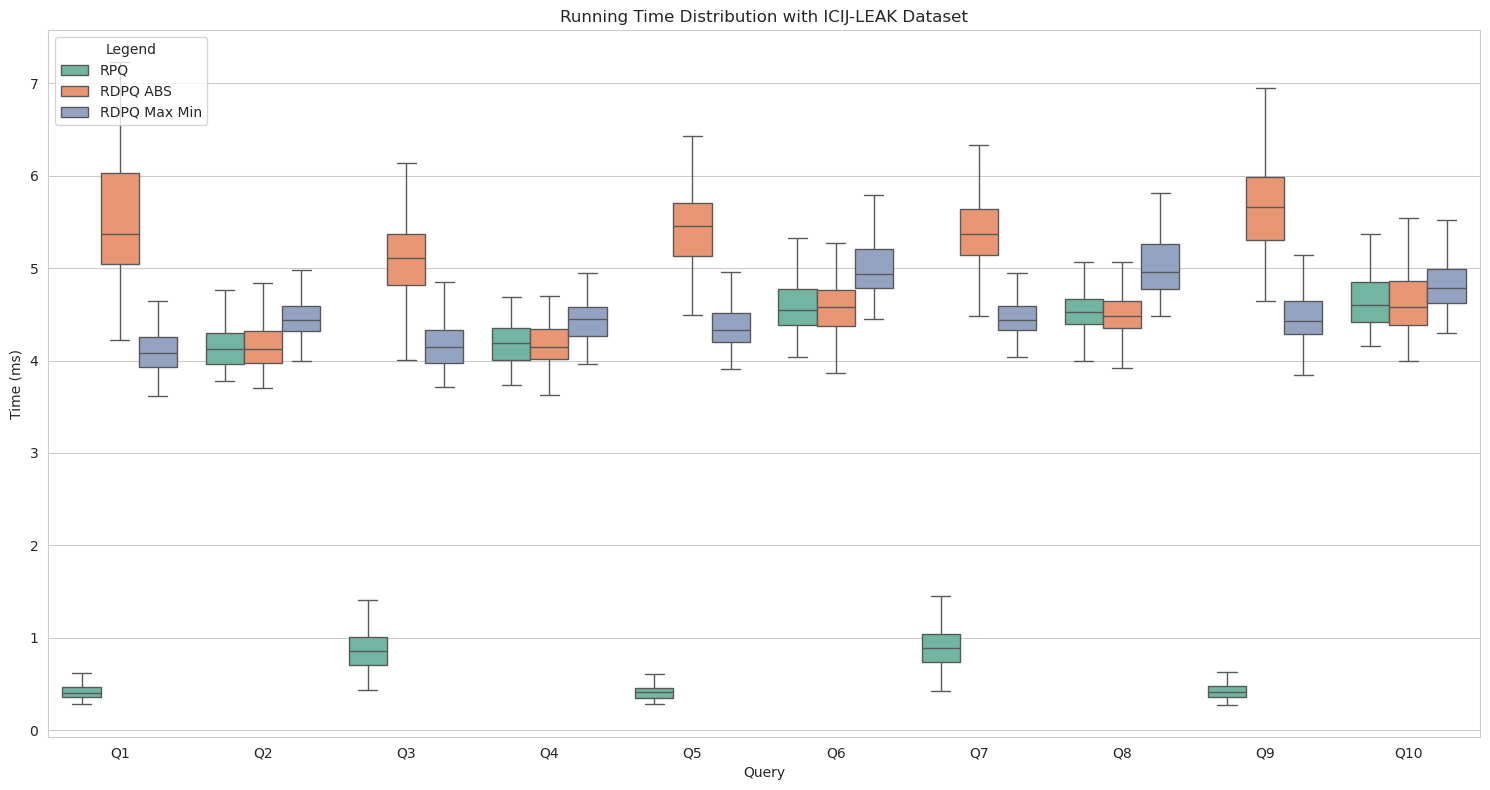

In [9]:
import pickle 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
with open("result/icij_leak_static.pkl","rb+") as f:
    data_ytb = pickle.loads(f.read()) 

data_groups = []
for i in range(10):  # Q1-Q10
    id = 0
    for dtype in ["RPQ", "RDPQ ABS", "RDPQ Max Min"]:  # 3 种数据类型
        data = list(map(lambda x: x, data_ytb[i*3 + id][2])) # 乘1000转换为ms
        id = id + 1
        data_groups.append((f"Q{i+1}", dtype, data))
# 转换为 DataFrame
df_list = []
for group, dtype, values in data_groups:
    for v in values:
        df_list.append((group, dtype, v))
df = pd.DataFrame(df_list, columns=["Query", "Data Constraint", "Running Time"])

# 计算每组数据的平均值
mean_values = df.groupby(["Query", "Data Constraint"])["Running Time"].mean().reset_index()

# 设置绘图风格
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# **改回线性坐标**
# plt.yscale("log")  # 移除对数坐标

# 绘制箱线图
ax = sns.boxplot(x="Query", y="Running Time", hue="Data Constraint", data=df, palette="Set2", showfliers=False)


# **调整 Y 轴单位（毫秒）**
plt.ylabel("Time (ms)")

# 调整图例
plt.legend(title="Legend", loc="upper left")

# 添加标题
plt.title("Running Time Distribution with ICIJ-LEAK Dataset")

# 旋转 X 轴标签
# plt.xticks(rotation=45)

# **自动调整布局，防止标签重叠**
plt.tight_layout()
print(11111)
# 显示图表
plt.show()

In [12]:
import pickle 
import numpy as np
with open("result/icij_leak_static.pkl","rb+") as f:
    data_ytb = pickle.loads(f.read()) 


for i in data_ytb:
    print(f"{i[1]} query, the max mem is {format(np.max(i[3]),'.3f')} mb, the min mem is ({format(np.min(i[3]))}) mb,the average mem is {format(np.mean(i[3]),'.3f')} mb")



REGEX Q0 query, the max mem is 3.125 mb, the min mem is (0.0) mb,the average mem is 0.034 mb
RDPQ Q11 query, the max mem is 29.062 mb, the min mem is (0.0) mb,the average mem is 3.730 mb
RDPQ Q12 query, the max mem is 18.750 mb, the min mem is (0.0) mb,the average mem is 0.192 mb
RDPQ Q13 query, the max mem is 0.156 mb, the min mem is (0.0) mb,the average mem is 0.003 mb
RDPQ Q14 query, the max mem is 0.156 mb, the min mem is (0.0) mb,the average mem is 0.005 mb
RDPQ Q15 query, the max mem is 0.156 mb, the min mem is (0.0) mb,the average mem is 0.006 mb
REGEX Q1 query, the max mem is 0.156 mb, the min mem is (0.0) mb,the average mem is 0.008 mb
RDPQ Q21 query, the max mem is 0.156 mb, the min mem is (0.0) mb,the average mem is 0.023 mb
RDPQ Q22 query, the max mem is 0.156 mb, the min mem is (0.0) mb,the average mem is 0.002 mb
RDPQ Q23 query, the max mem is 0.156 mb, the min mem is (0.0) mb,the average mem is 0.002 mb
RDPQ Q24 query, the max mem is 0.000 mb, the min mem is (0.0) mb,the

In [1]:
with open("data/ldbc_scale10.qm", "r") as f:
    line = f.readline()
    s = set()
    while line:
        l = map(
            lambda x: x.split(":")[0],
            filter(
                lambda x: not x.split(":")[0].isdigit(),
                line.split(" ")[1:]))
        line = f.readline()
        p = list(l)
        if "->" in p:
            s.add(p[2])
len(s)

15

In [1]:
with open("data/ldbc_scale10.qm", "r") as f:
    line = f.readline()
    s = set()
    properties = set()
    lv = set()
    while line:
        l = map(
            lambda x: x.split(":")[0],
            filter(
                lambda x: not x.split(":")[0].isdigit(),
                line.split(" ")[1:]))
        line = f.readline()
        p = list(l)
        if "->" in p:
            s.add(p[2])
        else:
            for ele in p:
                properties.add(ele)
len(s)
len(properties)
len(lv)

0

In [16]:
def dense(a, b):
    return a /(b * (b-1))

# dense(3193390, 1908466 )
dense(178000000, 30000000 )

1.9777778437037058e-07